In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LoR
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_9_Hr_Analytics.csv')

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape

(1470, 35)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
#Checking null values

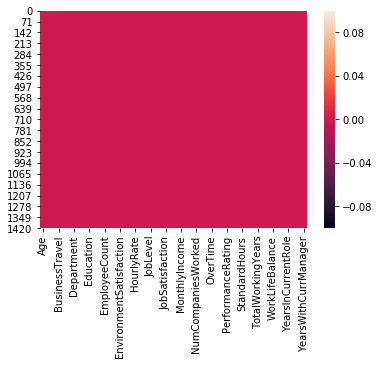

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
data.EmployeeNumber

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

In [13]:
#Dropping EmployeeNumber from dataset as it is index

In [14]:
data.drop(["EmployeeNumber"],inplace=True,axis=1)

In [15]:
data.shape

(1470, 34)

In [16]:
data.StandardHours.unique()

array([80], dtype=int64)

In [17]:
data.Over18.unique()

array(['Y'], dtype=object)

In [18]:
#We can also remove Over18 and StandardHours from the dataset as it has only one unique value

In [19]:
data.drop(["StandardHours","Over18"],inplace=True,axis=1)

In [20]:
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,3,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,4,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,4,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,3,...,3,2,2,17,3,2,7,7,7,7


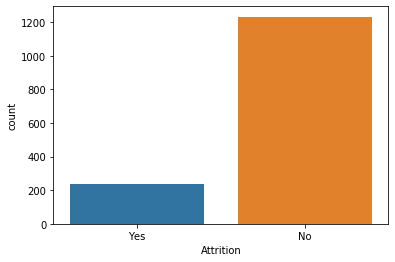

In [21]:
#Displaying count of attrition for yes and no
sns.countplot(x='Attrition',data=data)
plt.show()

Attrition value for No is very high as compare to Yes.

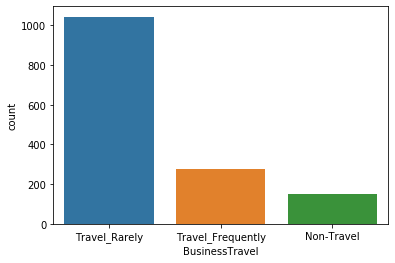

In [22]:
sns.countplot(x="BusinessTravel",data=data)

Travel_Rarely employee count is very high 

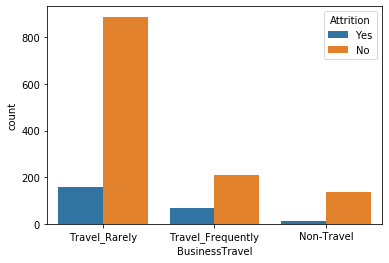

In [23]:
#Checking for Attrition in BusinessTravel

sns.countplot(x="BusinessTravel",data=data,hue="Attrition")
plt.show()


Attrition is high for Travel_Rarely category

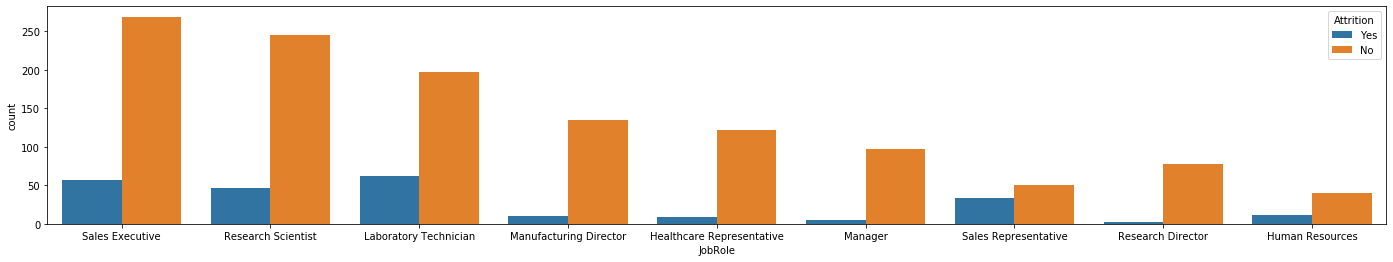

In [24]:
plt.figure(figsize=(24,4))
sns.countplot(x="JobRole",data=data,hue="Attrition")
plt.show()

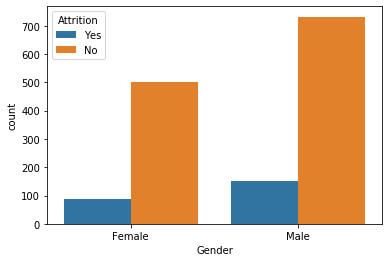

In [25]:
#Checking attrition based on Gender
sns.countplot(x="Gender",data=data,hue="Attrition")
plt.show()

Attrition in Male is higher

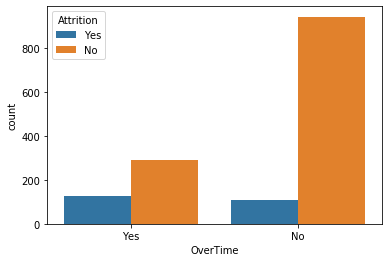

In [26]:
#Checking attrition based on OverTime
sns.countplot(x="OverTime",data=data,hue="Attrition")
plt.show()

Attrition rate is high for Overtime = No

In [27]:
#Checking correlation of dataset

data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,NaN,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [28]:
data.EmployeeCount.unique()

array([1], dtype=int64)

In [29]:
from sklearn.preprocessing import LabelEncoder as LE

le = LE()
data['Attrition'] = le.fit_transform(data['Attrition'])

In [30]:
#Removing EmployeeCount from dataset as it has only one unique value
data.drop(["EmployeeCount"],inplace=True,axis=1)

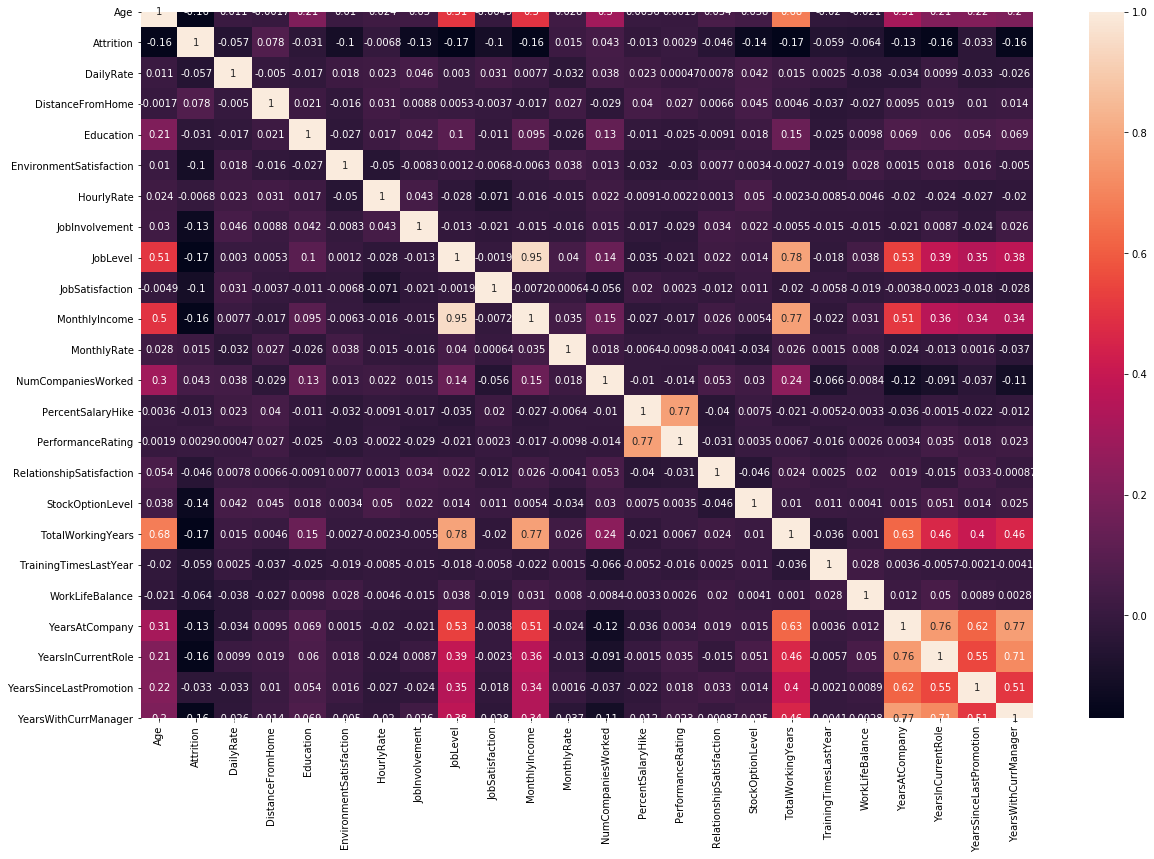

In [31]:
plt.figure(figsize=(20,13))
sns.heatmap(data.corr(),annot=True)

Total Working Years is negatively correlated to Attrition.

Job Level is negatively correlated to Attrition.

Years In Current Role is negatively correlated to Attrition.

DistanceFromHome is correlated to Attrition.

In [32]:
#Encoding object values
from sklearn.preprocessing import LabelEncoder as LE

le = LE()

le_count = 0
for col in data.columns[1:]:
    if len(list(data[col].unique())) <= 2:
        le.fit(data[col])
        data[col] = le.transform(data[col])
        le_count += 1
    
print('{} columns were label encoded'.format(le_count))

4 columns were label encoded


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked      

In [34]:
#COnverting categorical values in to dummy

data = pd.get_dummies(data,drop_first=True)

In [35]:
data.shape

(1470, 45)

In [36]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


In [37]:
#Scaling the data with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler as MMS

scaler = MMS(feature_range=(0,5))
hr_col = list(data.columns)
hr_col.remove('Attrition')
for col in hr_col:
    data[col] = data[col].astype(float)
    data[[col]] = scaler.fit_transform(data[[col]])
data['Attrition'] = pd.to_numeric(data['Attrition'],downcast='float')
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [38]:
#Checking the skewness 

data.skew()

Age                                  0.413286
Attrition                            1.844366
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
Gender                              -0.408665
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
OverTime                             0.964489
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                   

From the skewness, there are 14 columns are having skewness value more than 0.5

In [39]:
#split the data into x and y

x = data.drop(['Attrition'],axis=1)
y = data[["Attrition"]]

In [40]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [41]:
print(x.skew())

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.289305
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
Gender                              -0.408665
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             0.147366
JobSatisfaction                     -0.329672
MonthlyIncome                        0.659691
MonthlyRate                          0.018578
NumCompaniesWorked                   0.316404
OverTime                             0.964489
PercentSalaryHike                    0.102796
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.138186
TotalWorkingYears                    0.236797
TrainingTimesLastYear                0.586413
WorkLifeBalance                      0.774771
YearsAtCompany                    

In [42]:
def best_model_classifier(model):
    i = 0
    max_accu_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        accu_score = roc_auc_score(test_y,pred_y)
        accu_score = round(accu_score*100)
        if accu_score > max_accu_score:
            max_accu_score = accu_score
            final_r_state = r_state
    print("Max  AUC Score Corresponding to random state ", final_r_state, " is ",max_accu_score)    

#### LOGISTIC REGRESSION

In [43]:
lr = LoR()
best_model_classifier(lr)

Max  AUC Score Corresponding to random state  93  is  79.0


In [44]:
print("Mean roc auc score for logistic classifier: ",cross_val_score(lr,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lr,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lr,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.84356482074813
standard deviation in roc auc score for logistic classifier:  0.018852113030141598
[0.84733468 0.84758772 0.83426652 0.81551635 0.87311884]


#### DTC

In [45]:
dtc=DTC()
best_model_classifier(dtc)

Max  AUC Score Corresponding to random state  57  is  71.0


In [46]:
print("Mean roc auc score for decision tree classifier: ",cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for decision tree classifier: ",cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lr,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for decision tree classifier:  0.6170958437769406
standard deviation in roc auc score for decision tree classifier:  0.018719246857155435
[0.84733468 0.84758772 0.83426652 0.81551635 0.87311884]


#### GNB

In [47]:
gnb = GNB()
best_model_classifier(gnb)

Max  AUC Score Corresponding to random state  64  is  78.0


In [48]:
print("Mean roc auc score for Gaussian NB: ",cross_val_score(gnb,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for Gaussian NB: ",cross_val_score(gnb,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gnb,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for Gaussian NB:  0.7638784336094717
standard deviation in roc auc score for Gaussian NB:  0.030339183164455077
[0.77876181 0.78694332 0.72064777 0.73516693 0.79787234]


#### SVC

In [49]:
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [50]:
svc=SVC(kernel="linear",C=1)
best_model_classifier(svc)

Max  AUC Score Corresponding to random state  46  is  77.0


In [51]:
print("Mean roc auc score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for SVC:  0.8416079180927047
standard deviation in roc auc score for SVC:  0.015849116051277402
[0.83704453 0.85501012 0.83366354 0.81888947 0.86343193]


#### RANDOM FOREST CLASSIFIER

In [52]:
rfc = RFC() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 100}

In [53]:
rfc=RFC(n_estimators=100)
best_model_classifier(rfc)

Max  AUC Score Corresponding to random state  66  is  62.0


In [54]:
print("Mean roc auc score for rfc: ",cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for RFC: ",cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rfc,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for rfc:  0.8073244309678431
standard deviation in roc auc score for RFC:  0.026975215488090846
[0.83189946 0.79305837 0.82711689 0.7804878  0.86914029]


#### KNN

In [55]:
neighbors = {"n_neighbors":range(1,30)}
knn = KNC()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 10}

In [56]:
knn = KNC(n_neighbors=10)
best_model_classifier(knn)

Max  AUC Score Corresponding to random state  57  is  53.0


In [57]:
print("Mean roc auc score for KNN: ",cross_val_score(knn,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for KNN: ",cross_val_score(knn,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(knn,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for KNN:  0.6167185739337366
standard deviation in roc auc score for KNN:  0.03177357849163056
[0.61842105 0.60412449 0.66108192 0.56564608 0.63431932]


FROM THE ABOVE ALL OBSERVATION WE ARE CONCLUDING WITH LOGISTIC CLASSIFIER AS IT GAVES US HIGHEST ROC SCORE. SO WE ARE SAVING LOGISTIC CLASSIFIER TO SAVE OUR FINAL MODEL.

In [58]:
#LOGISTIC CLASSIFIER gave max score for random state = 93
lr=LoR()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=93)
lr.fit(train_x,train_y)
pred_y = lr.predict(test_x)
roc_auc_score = roc_auc_score(test_y,pred_y)
roc_auc_score = round(roc_auc_score*100)
print("ROC AUC score is : ", roc_auc_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

ROC AUC score is :  79.0
Confusion matrix is

[[245   4]
 [ 18  27]]
Classification report 

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       249
         1.0       0.87      0.60      0.71        45

    accuracy                           0.93       294
   macro avg       0.90      0.79      0.83       294
weighted avg       0.92      0.93      0.92       294



### SAVING MODEL

In [59]:
joblib.dump(lr, 'Project_9_Hr_Analytics.pkl')

['Project_9_Hr_Analytics.pkl']

As we saw, model is giving good prediction score. In future, to give good prediction base on Attrition this model is capable, more data will make model make accurate prediction.